# Praca domowa 5
### Paulina Jaszczuk

## Import pakietów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram

## Import danych

In [3]:
df = pd.read_csv('clustering.csv', header=None, names=['col_x', 'col_y'])
df.head()

,col_x,col_y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


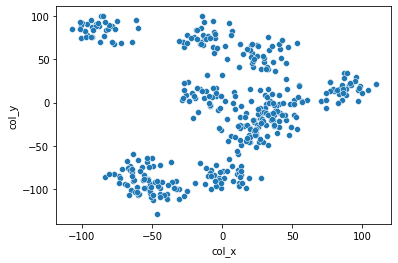

In [4]:
sns.scatterplot(x='col_x', y='col_y', data=df)
plt.show()

Tak wygląda graficzna interpretacja naszych danych. 
Na ten moment trudno stwierdzić, jkaa liczba klastrów będzie optymalna. 

## Normalizacja

Nasze dane nie mają rzeczywistego znaczenia, więc znormalizujmy je.

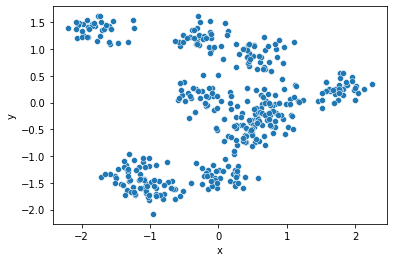

In [5]:
df = pd.DataFrame(whiten(df))
df.rename(columns = {0:'x', 1:'y'}, inplace=True)
sns.scatterplot(x='x', y='y', data=df)
plt.show()

## K-means

In [6]:
# klasteryzacja metodą k-średnich; num_clusters odpowiada za liczbę klastrów
def kmeans_clustering(num_clusters) :
    cluster_centers, distortion = kmeans(df[['x', 'y']], num_clusters)
    df['cluster_labels'], distortion_list = vq(df[['x', 'y']], cluster_centers)
    sns.scatterplot(x='x', y='y', hue='cluster_labels', data = df)
    plt.title("K-means clustering using " + str(num_clusters) + " clusters")
    plt.show()

Poeksperymentujmy z liczbą klastrów i przyjrzyjmy się, jak wygląda to na wykresach.

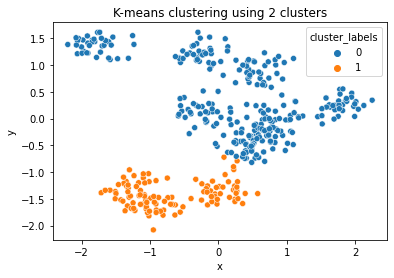

In [7]:
kmeans_clustering(2)

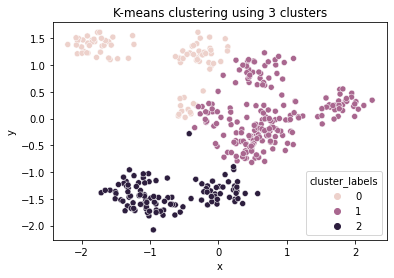

In [8]:
kmeans_clustering(3)

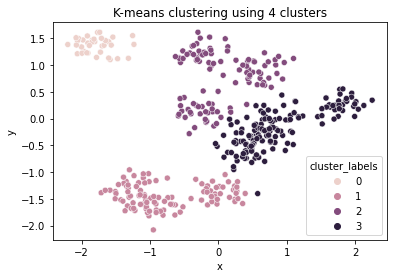

In [9]:
kmeans_clustering(4)

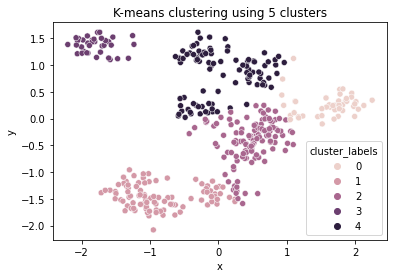

In [10]:
kmeans_clustering(5)

Trudno zdecydować, jaka liczba klastrów będzie optymalna. Wydaje się, że 3 i 4 są najlepszym wyborem. Narysujmy wykres 'łokciowy'.

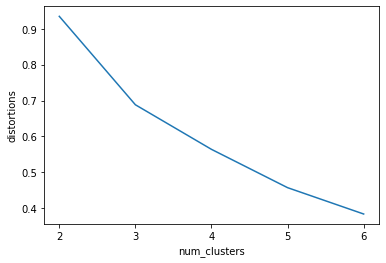

In [11]:
distortions = []
num_clusters = range(2, 7)

for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['x', 'y']], i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

Rzeczywiście, przy 3 klastrach możemy dostrzec największe przegięcie (jednak  i tak nie jest ono duże).

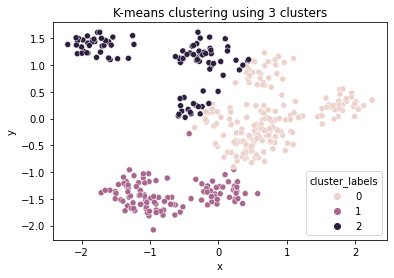

In [12]:
# finalny wykres
kmeans_clustering(3)

## Hierarchical clustering

In [13]:
# klasteryzacja metodą hierarchiczną
# zważywszy na to, że zadanie dotyczy wyboru optymalnej liczby klastrów, parametry method i metric nie będą 
# modyfikowane. Methoda 'ward' polega na wyznaczaniu sąsiedztwa klastrów poprzez sumę kwadratów odległości między obiektami, 
# zaś 'euclidean' to po prostu metryka euklidesowa.
def hierarchy_clustering(num_clusters, method='ward', metric='euclidean'):
    distance_matrix = linkage(df[['x', 'y']], method = method, metric = metric)
    df['cluster_labels'] = fcluster(distance_matrix, num_clusters, criterion='maxclust')
    sns.scatterplot(x='x', y='y', hue='cluster_labels', data = df)
    plt.title("Hierarchical clustering using " + str(num_clusters) + " clusters")
    plt.show()

Poeksperymentujmy z liczbą klastrów i przyjrzyjmy się, jak wygląda to na wykresach.

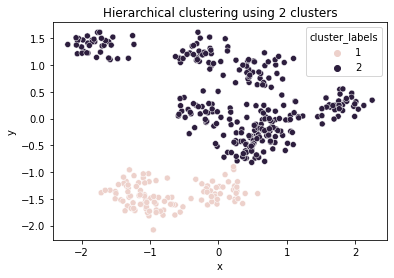

In [14]:
hierarchy_clustering(2)

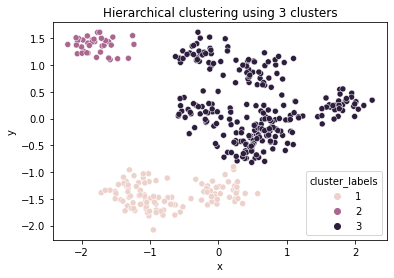

In [15]:
hierarchy_clustering(3)

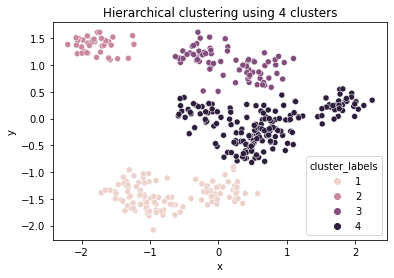

In [16]:
hierarchy_clustering(4)

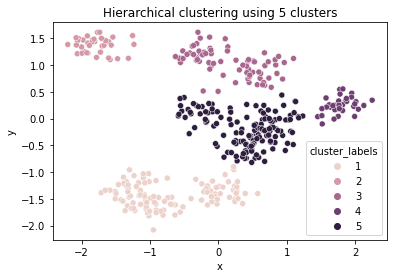

In [17]:
hierarchy_clustering(5)

Znowu na pierwszy rzut oka trudno ocenić, jaka liczba klastrów jest najbardziej optymalna. Zarówno 3, 4 jak i 5 klastrów dobrze dzielą dane. Narysujmy więc dendrogram.

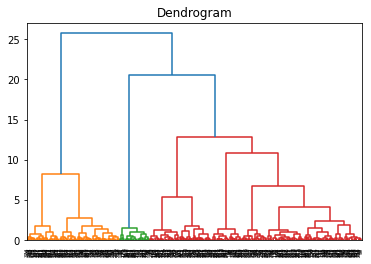

In [18]:
distance_matrix = linkage(df[['x', 'y']], method = 'ward', metric = 'euclidean')
dn = dendrogram(distance_matrix)
plt.title("Dendrogram")
plt.show()

Z wykresu możemy wywnioskować, że największe wzrosty odległości zaczynają się powyżej odległości 14, zatem wydaje się, że optymalnym wyborem będą 3 klastry.

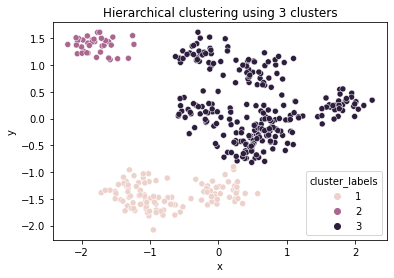

In [19]:
# finalny wykres
hierarchy_clustering(3)

## Podsumowanie

Mimo że wkorzystując obie metody, zdecydowaliśmy się finalnie na tę samą liczbę klastrów, to na wizualizacjach widzimy, że podzieliły one obserwacje na klastry w różny sposób. K-means dążyła wyraźnie do 'zrównania' klastrów ze sobą, tracąc, jak się wydaje, na samej jakości klasyfikacji obserwacji.